In [1]:
%matplotlib inline
import json
import pprint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
with open('/home/ubuntu/Notebooks/rnn_experiments_3.json', 'r') as f:
    results = json.load(f)
    
with open('/home/ubuntu/Notebooks/rnn_experiments_2.json', 'r') as f:
    results += json.load(f)

with open('/home/ubuntu/Notebooks/rnn_experiments_1.json', 'r') as f:
    results += json.load(f)
    
with open('/home/ubuntu/Notebooks/rnn_experiments.json', 'r') as f:
    results += json.load(f)



In [3]:
print(len(results))


70


In [4]:
[r['best_val_acc'] for r in results]

[0.720310765948068,
 0.7179060302925604,
 0.7208657047283724,
 0.7214206436850872,
 0.7192008878582281,
 0.7186459490558724,
 0.7214206436850872,
 0.7171661118600177,
 0.7223455421226889,
 0.7179060303146116,
 0.7225305215985167,
 0.7073621901370312,
 0.6903440621090605,
 0.7173510913137944,
 0.704957454812293,
 0.7204957454018447,
 0.7153163151612248,
 0.6999630041798088,
 0.7162412135988264,
 0.6785053643658123,
 0.6953385126974422,
 0.7114317426406318,
 0.7199408066215403,
 0.7214206436850872,
 0.7077321495958667,
 0.7136514982910805,
 0.7121716610511232,
 0.7241953386230201,
 0.7203107657496064,
 0.7180910099668499,
 0.722715501405114,
 0.7184609694036342,
 0.7190159082059899,
 0.7204957454018447,
 0.7245652977951889,
 0.7060673325272608,
 0.7110617833361553,
 0.723270440229521,
 0.6958934518526185,
 0.7143914169000336,
 0.7066222715280782,
 0.7160562339245369,
 0.6761006288867151,
 0.7208657049047827,
 0.7167961523791309,
 0.7127266002062996,
 0.7162412135767752,
 0.71735109149020

In [5]:
idx = 0
max_acc = 0

for i in range(len(results)):
    if results[i]['best_val_acc'] > max_acc:
        max_acc = results[i]['best_val_acc']
        idx = i
print(idx)
print(max_acc)
results[idx]

34
0.7245652977951889


{'hyperparam': {'dropout_rate': 0.48576812493824445,
  'n_lstm_layers': 4,
  'lstm_hidden_size': 64,
  'n_fc_layers': 4,
  'fc_hidden_size': 64,
  'use_backer': False,
  'data_fc_hidden_size': 64,
  'opt': 'adam',
  'lr': 0.0001457152018119632,
  'clipnorm': 5.0},
 'history': {'val_loss': [0.5930798792018742,
   0.5828187674934494,
   0.5766192604293217,
   0.5744445648098098,
   0.569558236760384,
   0.5621931980020507,
   0.5595242539203656,
   0.5601556525158079,
   0.5554248256635719,
   0.5583215505601387,
   0.5522728466431918,
   0.5464715671856846,
   0.5490917284048534,
   0.5449154702240213,
   0.5487077737842451,
   0.5439119411758524,
   0.5443816083561611,
   0.5458748068493735,
   0.5419267140138692,
   0.543723390537238,
   0.5410521384790302,
   0.5521385235738807,
   0.5480207610562515],
  'val_acc': [0.6834998149762451,
   0.6873843878276076,
   0.695708472178329,
   0.6977432483529498,
   0.7023677396589061,
   0.7075471699215772,
   0.7101368848985538,
   0.71198668

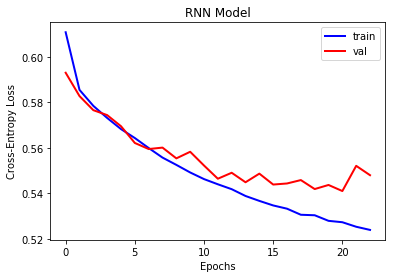

In [6]:
#generate plots
plt.figure()
plt.plot(results[idx]['history']['loss'], lw=2.0, color='b', label='train')
plt.plot(results[idx]['history']['val_loss'], lw=2.0, color='r', label='val')
plt.title('RNN Model')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.savefig('/home/ubuntu/Notebooks/images/loss.png') 
plt.show()
 

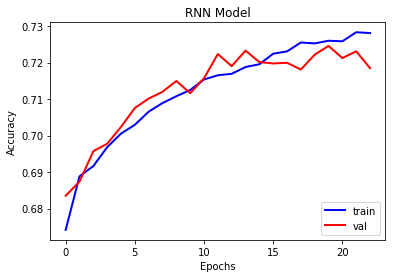

In [7]:
#generate plots
plt.figure()
plt.plot(results[idx]['history']['acc'], lw=2.0, color='b', label='train')
plt.plot(results[idx]['history']['val_acc'], lw=2.0, color='r', label='val')
plt.title('RNN Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('/home/ubuntu/Notebooks/images/accuracy.png')
plt.show()


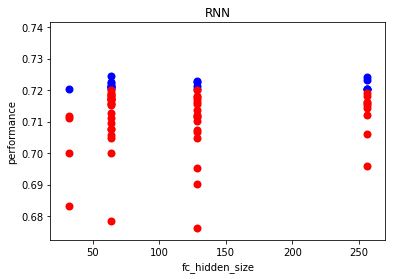

In [8]:
p = []
n = []
pa = []
na = []
size = []
a = []
name = 'data_fc_hidden_size'
# name = 'n_lstm_layers'
# name = 'lstm_hidden_size'
# name = 'n_fc_layers'
name = 'fc_hidden_size'
# name = 'dropout_rate'
# name = 'lr'
for r in results:
    if r['best_val_acc'] > 0.72:
        if name == 'lr':
            p.append(np.log10(r['hyperparam'][name]))
        else:
            p.append(r['hyperparam'][name])
        pa.append(r['best_val_acc'])
    else:
        if name == 'lr':
            n.append(np.log10(r['hyperparam'][name]))
        else:
            n.append(r['hyperparam'][name])
        na.append(r['best_val_acc'])

#generate plots
plt.figure()
plt.scatter(p, pa, lw=2.0, color='b')
plt.scatter(n, na, lw=2.0, color='r')

# plt.plot([0.723] * 2, lw=2.0, color='purple')

plt.title('RNN')
plt.xlabel(name)
plt.ylabel('performance')
#plt.legend(loc='upper right')
plt.show()

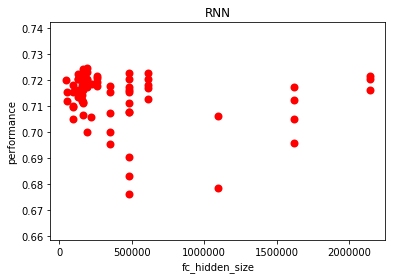

In [9]:
p = []
n = []
pa = []
na = []
size = []
a = []
name = 'data_fc_hidden_size'
name = 'n_lstm_layers'
name = 'lstm_hidden_size'
name = 'n_fc_layers'
name = 'fc_hidden_size'
for r in results:
    # p.append(r['hyperparam']['lstm_hidden_size'])
    # p.append(r['hyperparam']['n_lstm_layers'])
    # p.append(r['hyperparam']['dropout_rate'])
    # p.append(r['hyperparam']['n_fc_layers'])
    # p.append(r['hyperparam']['fc_hidden_size'])
    lh = r['hyperparam']['lstm_hidden_size']
    ll = r['hyperparam']['n_lstm_layers']
    fl = r['hyperparam']['n_fc_layers']
    fh = r['hyperparam']['fc_hidden_size']
    dh = r['hyperparam']['data_fc_hidden_size']
    x = 300
    size.append((x+lh)*lh*4 + 2*lh*lh*4*(ll-1) + 
                (lh * fl + fl*fl*(fl-1)) + dh*6)
    a.append(r['best_val_acc'])
    if r['best_val_acc'] > 0.72:
        p.append(r['hyperparam'][name])
        pa.append(r['best_val_acc'])
    else:
        n.append(r['hyperparam'][name])
        na.append(r['best_val_acc'])

#generate plots
plt.figure()
# plt.scatter(p, pa, lw=2.0, color='b')
# plt.scatter(n, na, lw=2.0, color='r')
plt.scatter(size, a, lw=2.0, color='r')

plt.title('RNN')
plt.xlabel(name)
plt.ylabel('performance')
#plt.legend(loc='upper right')
plt.show()